# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Reading the dataset

In [2]:
# Load data
loan_data = pd.read_csv('Loan_Data.csv')

In [3]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Getting Information related to all the Columns of the dataset 

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Understanding the Correlation among the columns of the dataset 

In [6]:
correlation = loan_data.corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

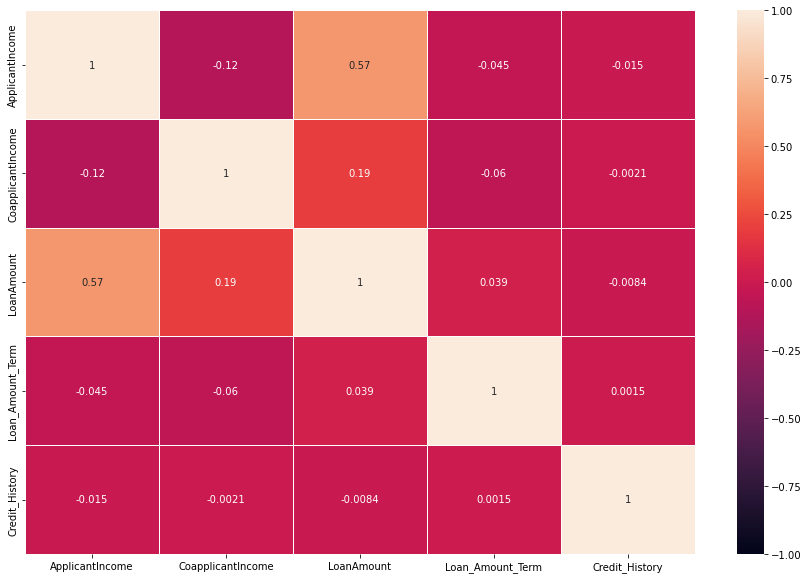

In [7]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(loan_data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

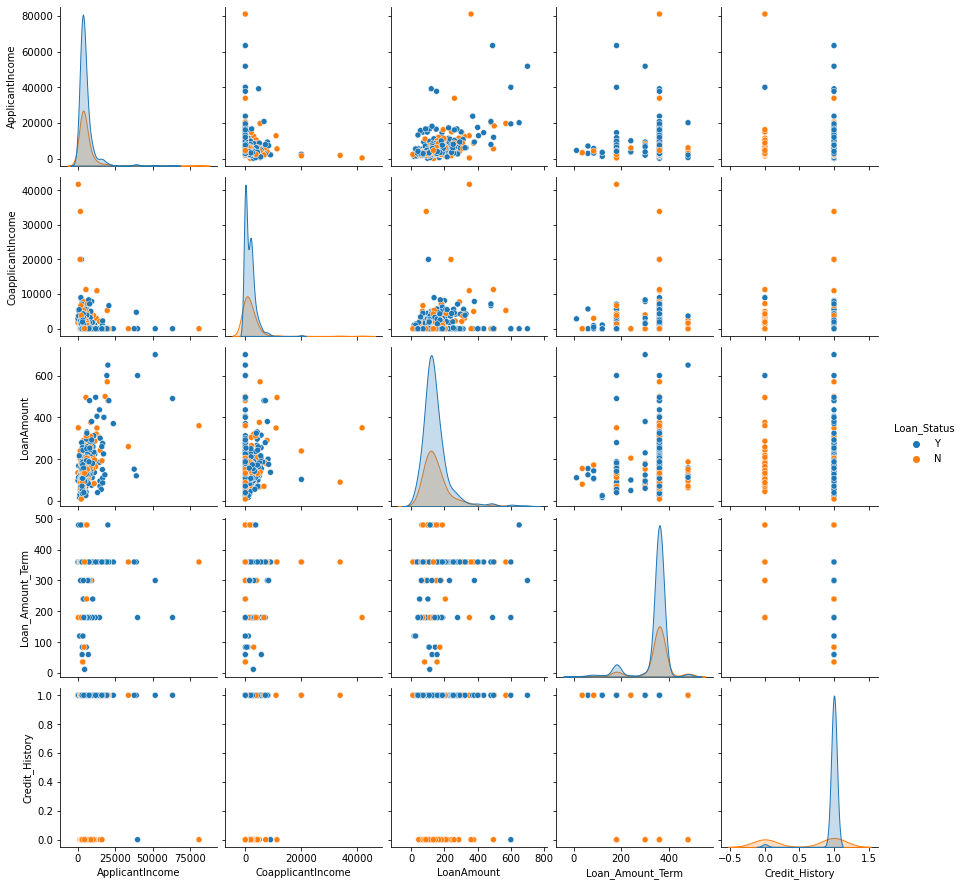

In [8]:
sns.pairplot(loan_data, diag_kind= 'kde', hue = 'Loan_Status')

# Removing the null values 

In [9]:
# Missing Values/Null Values Count
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Replace missing values with median for numerical columns and mode for categorical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in num_cols:
    loan_data[col].fillna(loan_data[col].median(), inplace=True)
for col in cat_cols:
    loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)

In [11]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoding the Categorical features 

In [12]:
# Convert categorical features to numerical features
le = LabelEncoder()
for col in cat_cols:
    loan_data[col] = le.fit_transform(loan_data[col])
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


# Feature selection and  Splitting the data into training and testing sets

In [13]:
# Split the data into training and testing sets
X = loan_data.drop(columns = ['Loan_ID','Loan_Status'], axis=1)
y = loan_data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset 

In [14]:
# feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Training and evaluating the KNN model

In [15]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Training and evaluating the Naive Bayes model

In [16]:
# Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)

# Training and evaluating the Decision Tree model

In [17]:
# Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

# Training and evaluating the Logistic Regression model

In [18]:
# Logistic Regression classifier
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

# Printing the accuracy scores

In [19]:
# Print results
print("KNN Accuracy:", accuracy_knn*100)
print("KNN Confusion Matrix:\n", confusion_knn)
print("Naive Bayes Accuracy:", accuracy_nb*100)
print("Naive Bayes Confusion Matrix:\n", confusion_nb)
print("Decision Tree Accuracy:", accuracy_dt*100)
print("Decision Tree Confusion Matrix:\n", confusion_dt)
print("Logistic Regression Accuracy:", accuracy_lr*100)
print("Logistic Regression Confusion Matrix:\n", confusion_lr)

KNN Accuracy: 75.60975609756098
KNN Confusion Matrix:
 [[17 26]
 [ 4 76]]
Naive Bayes Accuracy: 78.04878048780488
Naive Bayes Confusion Matrix:
 [[18 25]
 [ 2 78]]
Decision Tree Accuracy: 74.79674796747967
Decision Tree Confusion Matrix:
 [[19 24]
 [ 7 73]]
Logistic Regression Accuracy: 78.86178861788618
Logistic Regression Confusion Matrix:
 [[18 25]
 [ 1 79]]


# Comparing the accuracy score using bar graph

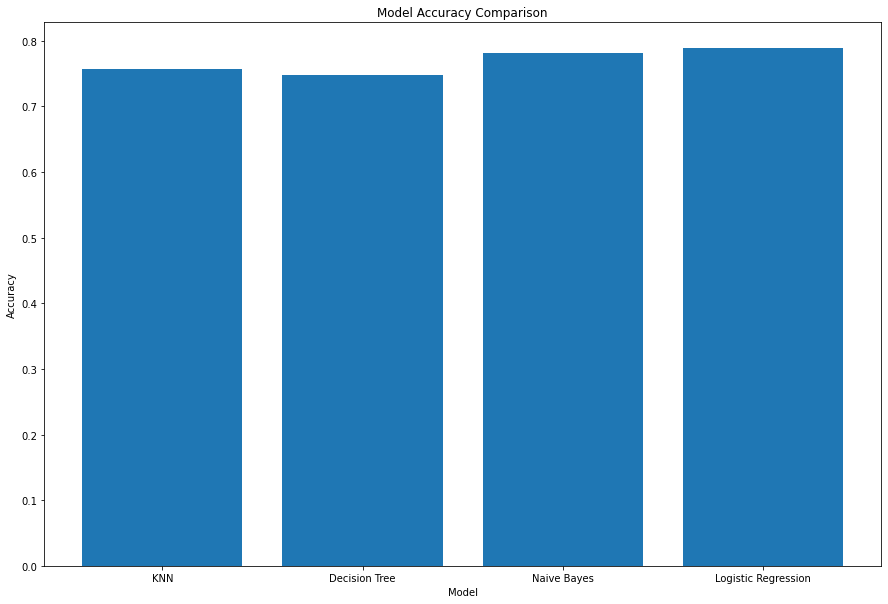

In [20]:
# Create a list of model names and their accuracy scores
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression']
accuracy_scores = [accuracy_knn, accuracy_dt, accuracy_nb, accuracy_lr]

plt.figure(figsize=(15,10))
# Create a bar chart to compare the accuracy of each model
plt.bar(model_names, accuracy_scores)

# Set the title and axis labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()